# Task 2
# Single Agent A* with velocity and angle space path planning

In [10]:
import matplotlib.pyplot as plt
import copy
import time
from typing import *
from matplotlib.patches import FancyArrow
import numpy as np
import math

# Build a Grid Map of a road junction
Designing a MAP [10x10] 
1-blocked
0-allowed to move

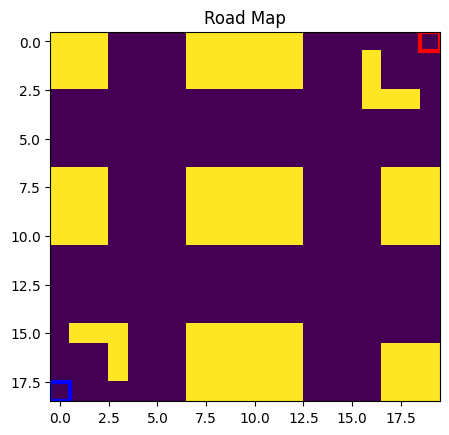

In [11]:

FREE = 0
OCCUPIED = 100

grid_map = [
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
]


grid_map = [[cell* OCCUPIED for cell in row] for row in grid_map]

plt.imshow(grid_map);
plt.title("Road Map")
start = (18,0)
goal = (0,19)
# plt.plot([4.5,4.5],[9.5,-0.5], linestyle='--',color='white', linewidth=1) #added vertical lane
# plt.plot([-0.5,9.5],[4.5,4.5], linestyle='--',color='white', linewidth=1) #added horizontal lane
rect = plt.Rectangle((start[1]-.5, start[0]-.5), 1,1, fill=False, color="blue", linewidth=3)
plt.gca().add_patch(rect);

rect = plt.Rectangle((goal[1]-.5, goal[0]-.5), 1,1, fill=False, color="red", linewidth=3)
plt.gca().add_patch(rect);

# Helping Functions

In [12]:
def is_line_intersect(grid_map, x1, y1, x2, y2):
    # Bresenham's line algorithm
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    err = dx - dy

    while True:
        # Check if the current point lies within the grid boundaries
        if x1 >= 0 and x1 < len(grid_map) and y1 >= 0 and y1 < len(grid_map[0]):
            # If the current point is occupied (has a value of 1), return True
            if grid_map[x1][y1] == 100:
                return True

        # If both points have been reached, break the loop
        if x1 == x2 and y1 == y2:
            break
        
        # Calculate next point
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    
    # If none of the points on the line are occupied, return False
    return False

# # Example usage
# grid_map = [[1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
#             [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
#             [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
#             [1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
#             [1, 1, 1, 0, 0, 0, 0, 1, 1, 1]]

# x1, y1 = 9, 5
# x2, y2 = 8, 4

# if is_line_intersect(grid_map, x1, y1, x2, y2):
#     print("The line intersects with an occupied grid.")
# else:
#     print("The line does not intersect with any occupied grid.")


In [13]:
def is_valid(pos: tuple,grid_map: List[List[int]],cur: tuple=None) -> bool:
    """ given an index pair, eg. (6,4), check if it is inside the grid map and it is free """
    # if the pos is beyond the map, return false
    if pos[0]<0 or pos[1]<0 or pos[0]>len(grid_map)-1 or pos[1]>len(grid_map[0])-1:
        return False
    
    # if the pos is occupied, return false
    if grid_map[pos[0]][pos[1]] == OCCUPIED: 
        return False
    if cur:
        return not(is_line_intersect(grid_map,cur[0],cur[1],pos[0],pos[1]))
    return True



In [14]:

from IPython.display import clear_output

print_message=True

for i in range(50):
    clear_output(wait=False)

def cal_heuristic(pos: tuple, goal: tuple) -> float:
    return ((pos[0]-goal[0])**2 + (pos[1]-goal[1])**2)**0.5

Implementation of A*

In [15]:
class AStarPlanner():
    def __init__(self, grid_map):
        self.row = len(grid_map[1])
        self.col = len(grid_map[0])
        
        self.grid_map = copy.deepcopy(grid_map)
        
        # self.possible_moves = [[1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]]
        # [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, -1], [0, -1], [1, -1],
        # posible mooooveeee = [[0, -1], [1, -1], [1, 0], [1, 1], [0, 1]]
        
        self.velocity_range = [1,2,3]  # Sample velocity range

        self.angle_range = [0, 45, 90,135,-135,-90,-45,180]  # Sample angle range      
        self.possible_moves =[]
        for vel in self.velocity_range:
                for angle in self.angle_range:
                    dx=int(round(vel*math.cos(math.radians(angle)))) 
                    dy=int(round(vel*math.sin(math.radians(angle))))
                    self.possible_moves.append([dx,dy])
        
        # print("posible move =",self.possible_moves)
        
    def search(self, start, goal, heu_wgt=1):
        self.start, self.goal = start, goal

        # check if the given start and goal are valid
        if not is_valid(start, self.grid_map) or not is_valid(goal, self.grid_map):
            print("The start or the goal is not valid")
            return False
        
        self.explored = []
        self.unexplored = []        
        self.g_score = [[float('inf') for i in range(self.row)] for j in range(self.col)] #created and filled with infinity 
        self.f_score = [[float('inf') for i in range(self.row)] for j in range(self.col)]
        self.cost_visualization = copy.deepcopy(grid_map)
        self.track_back = {}
        
        self.unexplored.append(self.start)
        sorted_not_explored = [self.start]
        self.g_score[self.start[0]][self.start[1]] = 0
        self.track_back[self.start] = None
        
        while(self.unexplored):
            # STEP1: move to the position in the queue with minimal `f(n)`
            cur = sorted_not_explored[0]
            self.unexplored.remove(cur)
            self.explored.append(cur)
            
            # STEP2: check if the standing position is the goal
            # if the pos with min f is the goal then return
            # if not, add the pos to explored[] and remove it from unexplored[]
            if cur == goal:
                print("The goal has been found")
                return True
            
            # STEP3: determine the next possible positions
            next_possible_pos = (np.array(self.possible_moves) + np.array(cur))
            for pos in next_possible_pos:
                next_pos = tuple(pos)
                
                # if the next is not valid, continue
                if not is_valid(next_pos, self.grid_map,cur):
                    continue

                # STEP4: store the possible positions into the queue
                # if the pos hasn't been evaluated,, 
                # then update the g_score, f_score, cost_visualization, and track_back
                if next_pos not in self.explored and next_pos not in self.unexplored:
                    self.unexplored.insert(0,next_pos)
                    self.g_score[next_pos[0]][next_pos[1]] = self.g_score[cur[0]][cur[1]]+1
                    self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal) #f=g+h
                    self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]] #copy of grid map also a matrix
                    self.track_back[next_pos] = cur
                
                # The pos has been evaluated, but the new g_score is lower then previous result. 
                # That means this is a shorter path to reach the pos
                # Update the g_score, f_score, cost_visualization, and track_back
                else:
                    g_score_tmp = self.g_score[cur[0]][cur[1]]+1
                    if g_score_tmp < self.g_score[next_pos[0]][next_pos[1]]:
                        self.g_score[next_pos[0]][next_pos[1]] = g_score_tmp
                        self.f_score[next_pos[0]][next_pos[1]] = self.g_score[next_pos[0]][next_pos[1]] + heu_wgt*cal_heuristic(next_pos, goal)
                        self.cost_visualization[next_pos[0]][next_pos[1]] = self.f_score[next_pos[0]][next_pos[1]]
                        self.track_back[next_pos] = cur
            
            # sort unexplored[] based on their f value. Hint: use sorted() with lambda function as key.
            sorted_not_explored = sorted(self.unexplored, key=lambda pos: self.f_score[pos[0]][pos[1]], reverse=False)

            if(print_message):
                print('sorted_not_explored: ', sorted_not_explored)
                
        print("No valid path to the goal")
        return False

Defining the Start and Goal Node and checking whether they are Valid

sorted_not_explored:  [(16, 2), (18, 3), (15, 0), (18, 2), (17, 1), (16, 0), (18, 1), (17, 0)]
sorted_not_explored:  [(18, 3), (15, 0), (18, 2), (17, 1), (16, 0), (17, 2), (16, 1), (18, 1), (17, 0)]
sorted_not_explored:  [(16, 5), (18, 6), (17, 4), (18, 5), (15, 0), (18, 4), (18, 2), (17, 1), (16, 0), (17, 2), (16, 1), (18, 1), (17, 0)]
sorted_not_explored:  [(14, 7), (13, 5), (14, 5), (15, 6), (15, 5), (16, 6), (18, 6), (15, 4), (14, 3), (17, 6), (17, 4), (18, 5), (16, 4), (17, 5), (15, 0), (18, 4), (18, 2), (17, 1), (16, 0), (17, 2), (16, 1), (18, 1), (17, 0)]
sorted_not_explored:  [(12, 9), (11, 7), (14, 10), (12, 7), (13, 8), (14, 9), (13, 7), (14, 8), (13, 5), (13, 6), (12, 5), (14, 5), (15, 6), (14, 6), (15, 5), (16, 6), (18, 6), (15, 4), (14, 3), (17, 6), (14, 4), (17, 4), (18, 5), (16, 4), (17, 5), (15, 0), (18, 4), (18, 2), (17, 1), (16, 0), (17, 2), (16, 1), (18, 1), (17, 0)]
sorted_not_explored:  [(12, 12), (11, 10), (12, 11), (11, 9), (12, 10), (11, 7), (11, 8), (14, 10), (

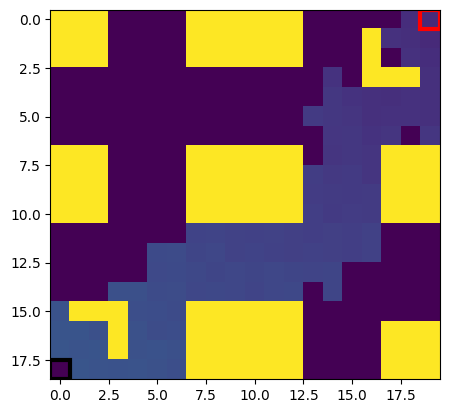

In [16]:
a_star_planner = AStarPlanner(grid_map)
start = (18,0)
goal = (0,19)
goal_found = a_star_planner.search(start, goal, heu_wgt=1)##when eu_wgt=0 is it djkstra?no heuristic function

if goal_found:
    plt.imshow(a_star_planner.cost_visualization)

    rect = plt.Rectangle((a_star_planner.start[1]-.5, a_star_planner.start[0]-.5), 1,1, fill=False, color="black", linewidth=3)
    plt.gca().add_patch(rect)

    rect = plt.Rectangle((a_star_planner.goal[1]-.5, a_star_planner.goal[0]-.5), 1,1, fill=False, color="red", linewidth=3)
    plt.gca().add_patch(rect)

The goal has been found
Time taken: 0.0 seconds


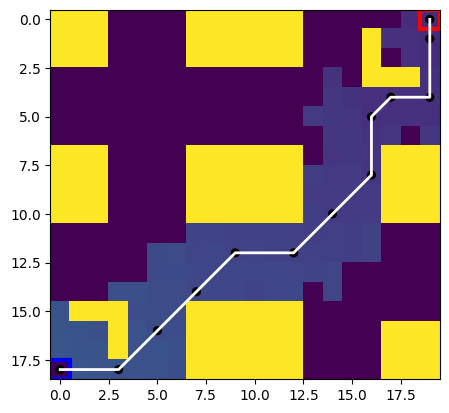

In [17]:
if goal_found:
    plt.imshow(a_star_planner.cost_visualization)

    rect = plt.Rectangle((a_star_planner.start[1]-.5, a_star_planner.start[0]-.5), 1,1, fill=False, color="blue", linewidth=3)
    plt.gca().add_patch(rect)

    rect = plt.Rectangle((a_star_planner.goal[1]-.5, a_star_planner.goal[0]-.5), 1,1, fill=False, color="red", linewidth=3)
    plt.gca().add_patch(rect)

    cur = a_star_planner.goal
    path = []
    while cur != None:
        path.append(cur)
        cur = a_star_planner.track_back[cur]
    path.reverse()
    
    for footprint in path:
        crle = plt.Circle((footprint[1], footprint[0]), 0.2, fill=True, color="black", linewidth=1)
        plt.gca().add_patch(crle)

    # Draw line connecting path points
    x = [point[1] for point in path]
    y = [point[0] for point in path]
    plt.plot(x, y, color='white', linewidth=2)

print_message=False
start_time = time.time()
a_star_planner.search(start, goal)
end_time = time.time()
elapsed_time = end_time - start_time
print("Time taken:", elapsed_time, "seconds")

# Measure the execution time of the search method


# Calculate the elapsed time


In [18]:
print_message=False
start_time = time.perf_counter()
a_star_planner.search(start, goal)
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print("Time taken:", elapsed_time, "seconds")

The goal has been found
Time taken: 0.002763100026641041 seconds
